# 數值方法
> **數值方法 (Numerical Methods)** 就是利用*四則運算*搭配*邏輯運算*來求方程是的解；與之相反的就是**解析解 (analytical solution)**。
> 為什麼要學數值方法呢？當然是為了讓電腦幫我們算一些很複雜的數學，因此有些人又稱數值方法為**電腦數學**。
> 
> -- [Applied Numerical Methods with MATLAB for Engineers and Scientists, Steven C. Chapra](https://blackwells.co.uk/bookshop/product/9781260083255?gC=5a105e8b&gclid=CjwKCAjw6qqDBhB-EiwACBs6x1fUNjCQN-RiZwcJ-m-uz3TohXFW3PxOzzJF5yh8Ew973oaQ9aJRoxoCVBYQAvD_BwE)

上面的連結就是我會使用的參考書。原文是用 MATLAB 舉例，但是隨著 python 的生態系日漸成熟，我們已經可以利用 `numpy`, `scipy`, `matplotlib` 等不同的函式庫取代 MATLAB 的功能

## 從物理到數學模型
![image](../assets/figure1-1.png)

假設一個高空彈跳的人從高處落下。在繩子拉緊之前他所受到的力有兩個：向下的重力，跟向上的空氣阻力。所以我們可以將他的力寫成
$$
F = F_D + F_U
$$
$F_D$ 為重力，所以我們可以直接知道 $F_D=mg$  
$F_U$ 是空氣阻力，從流體力學可以知道阻力跟速率的平方成正比，因此 $F_U=-c_{d}v^2$。負號是用來表示方向是朝上，當然這些正負號都可以根據自己的座標系去定義。根據牛頓第二運動定律：$F=ma$ 移項之後可以得到 $a=\frac{F}{m}$ 因為加速度可以寫作速度對時間的微分，所以可以得到
$$
\frac{dv}{dt} = \frac{mg-c_{d}v^2}{m}
$$
最後我們就能得到一個常微分方程式 (Ordinary Differential Equation, ODE)
$$
\frac{dv}{dt} = {g - \frac{c_{d}}{m}v^2}
$$
工程數學有教過 initial value problem (IVP)，當 $v=0$ at $t=0$ 的時候的解為
$$
v(t)=\sqrt {\frac{gm}{c_d}} \tanh (\sqrt{\frac{gc_d}{m}}t)
$$
這樣一來我們就有數學模型了！

### 解析解 Analytical Solution
接下來讓我們來定義一些參數：  
接近地表的重力加速度 $g=9.81m/s^2$、阻力係數 $c_d=0.25$、本肥宅體重 $m=72kg$
$$
v(t)=\sqrt {\frac{9.81 \times 72}{0.25}} \tanh (\sqrt{\frac{9.81 \times 0.25}{72}}t)
$$
讓我們用 `numpy` 來產生一些座標並且用 `matplotlib` 來畫一下。`matplotlib` 的 `pyplot()` 跟 MATLAB `plot()` 函數的用法是類似的。如果還沒安裝，可以在 **terminal/cmd** 打以下指令進行安裝
```bash
pip install numpy matplotlib
```
或者是直接在 jupyter 的 cell 裡直接打 `!pip install numpy matplotlib` 也可以

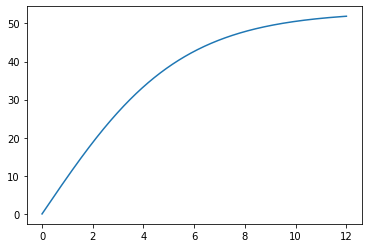

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate a linear sequence of 500 points
t = np.linspace(0, 12, 500)
# velocity from analytical solution
v = np.sqrt(9.81 * 72/0.25) * np.tanh(np.sqrt(9.81*0.25/72)*t)
analytic_line, = plt.plot(t, v) # draw the line
plt.show() # show the plot

### 數值解 Numerical Solution
還記得微積分怎麼定義微分的嗎？就是在曲線上取兩點為一割線，當你這兩的點非常靠近彼此時就可以近似為切線。
$$
\frac{dv}{dt} = {\lim_{\Delta t\to0} {\frac{\Delta v}{\Delta t}} } = {\lim_{\Delta t\to0} {\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}} }
$$
之前的數學就可以改寫成
$$
{\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}} = { g - \frac{c_d}{m}v(t_{i})^2 } 
$$
移項後，我們就能得到一個迭代式
$$
{v(t_{i+1})} = { v(t_{i}) + [g - \frac{c_d}{m}v(t_{i})^2] (t_{i+1}-t_{i}) }
$$
因為通常我們的取樣間隔是相同的，所以我們又可以稍微將上式精簡為
$$
{v(t_{i+1})} = { v(t_{i}) + [g - \frac{c_d}{m}v(t_{i})^2] \Delta t }
$$
根據以上描述，我們再來畫一下圖吧。

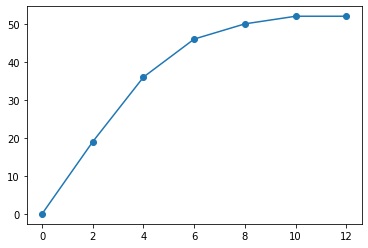

In [2]:
dt = 2
t = np.arange(0, 12 + dt, dt)
v = np.zeros_like(t)
for i in range(len(v) - 1):
    v[i+1] = v[i] + (9.81 - 0.25/72 * v[i]**2) * dt

plt.plot(t, v, '-o')
plt.show()

你可以調整`dt`觀察曲線的變化。如果嫌麻煩，下面我幫你做成動畫了。

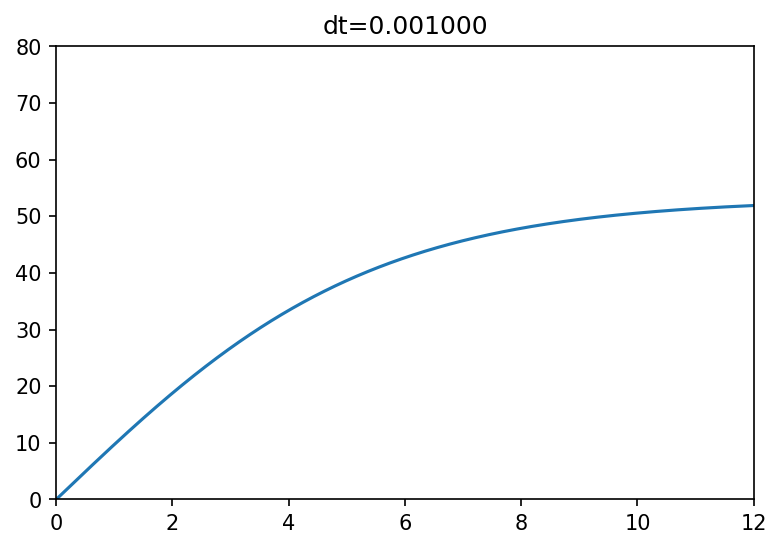

In [14]:
'''
fancy way to demonstrate convergence
'''
from IPython.display import HTML
from matplotlib import animation

dts = np.logspace(0.5, -3, 10)
# print(dts)
fig, ax = plt.subplots()
fig.dpi = 150
ax.set_xlim([0, 12])
ax.set_ylim([0, 80])

l, = ax.plot([], [])
def animate_numerical_velocity(i):
    dt = dts[i]
    t = np.arange(0, 12 + dt, dt)
    v = np.zeros_like(t)
    for i in range(len(v) - 1):
        v[i+1] = v[i] + (9.81 - 0.25/72 * v[i]**2) * dt
    l.set_data(t, v)
    ax.set_title(f'dt={dt:02f}')
anim = animation.FuncAnimation(fig, animate_numerical_velocity, frames=len(dts))
# HTML(anim.to_html5_video())
HTML(anim.to_jshtml())

## 小結
希望藉由以上的範例可以比較感受到解析解跟數值解的差異。身為一個永遠不懂ODE在幹麻、工數還曾經被當的學渣，進入數值領域也是沒問題的。